In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [28]:
words = open('names.txt', 'r').read().split('\n')

In [29]:
for i in words[:10]:
    print (i)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn


In [30]:
t = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [31]:
t

{('.', 'e', 'm'): 288,
 ('e', 'm', 'm'): 100,
 ('m', 'm', 'a'): 72,
 ('m', 'a', '.'): 174,
 ('.', 'o', 'l'): 104,
 ('o', 'l', 'i'): 69,
 ('l', 'i', 'v'): 54,
 ('i', 'v', 'i'): 78,
 ('v', 'i', 'a'): 147,
 ('i', 'a', '.'): 903,
 ('.', 'a', 'v'): 243,
 ('a', 'v', 'a'): 161,
 ('v', 'a', '.'): 93,
 ('.', 'i', 's'): 124,
 ('i', 's', 'a'): 142,
 ('s', 'a', 'b'): 76,
 ('a', 'b', 'e'): 173,
 ('b', 'e', 'l'): 201,
 ('e', 'l', 'l'): 822,
 ('l', 'l', 'a'): 337,
 ('l', 'a', '.'): 684,
 ('.', 's', 'o'): 152,
 ('s', 'o', 'p'): 21,
 ('o', 'p', 'h'): 37,
 ('p', 'h', 'i'): 61,
 ('h', 'i', 'a'): 81,
 ('.', 'c', 'h'): 352,
 ('c', 'h', 'a'): 236,
 ('h', 'a', 'r'): 329,
 ('a', 'r', 'l'): 287,
 ('r', 'l', 'o'): 44,
 ('l', 'o', 't'): 14,
 ('o', 't', 't'): 34,
 ('t', 't', 'e'): 121,
 ('t', 'e', '.'): 175,
 ('.', 'm', 'i'): 393,
 ('m', 'i', 'a'): 95,
 ('.', 'a', 'm'): 384,
 ('a', 'm', 'e'): 226,
 ('m', 'e', 'l'): 188,
 ('e', 'l', 'i'): 537,
 ('l', 'i', 'a'): 518,
 ('.', 'h', 'a'): 505,
 ('a', 'r', 'p'): 8,
 ('r

In [32]:
sorted(t.items(), key = lambda kv:kv[1])

[(('n', 'h', 'o'), 1),
 (('d', 's', 'a'), 1),
 (('p', 'y', 'p'), 1),
 (('m', 'a', 'p'), 1),
 (('a', 'p', 'l'), 1),
 (('z', 'h', 'u'), 1),
 (('p', 'a', 'm'), 1),
 (('r', 'w', 'e'), 1),
 (('o', 'i', 'f'), 1),
 (('n', 'y', 't'), 1),
 (('v', 'k', 'y'), 1),
 (('n', 'n', 'm'), 1),
 (('t', 's', 'h'), 1),
 (('.', 'o', 'f'), 1),
 (('i', 'q', 'r'), 1),
 (('q', 'r', 'a'), 1),
 (('v', 'n', 'i'), 1),
 (('e', 'y', 'k'), 1),
 (('c', 'o', 'c'), 1),
 (('o', 'x', 'y'), 1),
 (('y', 'y', '.'), 1),
 (('t', 't', 'n'), 1),
 (('g', 'i', 'g'), 1),
 (('o', 'l', 'g'), 1),
 (('v', 'e', 'm'), 1),
 (('i', 'o', 'b'), 1),
 (('o', 'b', 'h'), 1),
 (('z', 'u', 'c'), 1),
 (('v', 'a', 'c'), 1),
 (('m', 'h', '.'), 1),
 (('d', 'e', 'f'), 1),
 (('e', 'f', 'n'), 1),
 (('u', 'b', 'u'), 1),
 (('s', 'l', '.'), 1),
 (('z', 'o', 'o'), 1),
 (('o', 'o', 'e'), 1),
 (('e', 'p', 't'), 1),
 (('p', 't', 'e'), 1),
 (('p', 's', 'y'), 1),
 (('i', 'r', 'n'), 1),
 (('r', 's', 'u'), 1),
 (('i', 'x', 'c'), 1),
 (('x', 'c', 'h'), 1),
 (('i', 'a'

In [33]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)
N_2d = N.view(-1, 27*27)


In [34]:
N

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [35]:
# creating a character set of a-z + .

charset = sorted(list(set(''.join(words))))
charset

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [36]:
# creating a dict with mapping char => num 

stoi = {s:i+1 for i, s in enumerate(charset)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [37]:
# creating a dict with mapping num => char

itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [38]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[ix1, ix2, ix3] += 1


In [39]:
N

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0, 207, 190,  ...,  27, 173, 152],
         [  0, 169,   0,  ...,   0,   4,   0],
         ...,
         [  0,  57,   0,  ...,   1,  17,  11],
         [  0, 246,   0,  ...,   0,   0,   2],
         [  0, 456,   0,  ...,   0,  91,   1]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 40,   0,   5,  ...,   0,  20,  11],
         [ 36,  28,  20,  ...,   0,  12,   0],
         ...,
         [ 11,   5,   0,  ...,  17,   6,   3],
         [163, 389,  13,  ...,   0,  16,  40],
         [ 38, 123,   0,  ...,   0,  12,  22]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 46,   5,   5,  ...,   4,  31,   4],
         [  1,   8,   0,  ...,   0,   9,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [ 55,   4,   1,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 10,   0,   2,  ...,   0,  10,   0]

[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

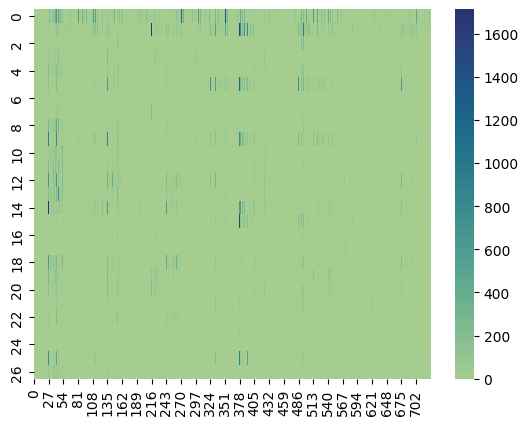

In [40]:
# plot 

plot = sns.heatmap(N_2d, cmap='crest')
plot.set(xlabel="", ylabel="")

In [41]:
N[1]

tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0],
        [  40,    0,    5,    5,   47,    0,    3,    3,   17,   12,    2,   12,
           46,   23,  174,    0,    0,    3,   83,   28,    8,    0,   14,    0,
            0,   20,   11],
        [  36,   28,   20,    1,   65,  173,    0,    0,   18,   76,    0,    0,
           10,    0,    2,    4,    0,    0,   85,    5,    0,    6,    0,    0,
            0,   12,    0],
        [  11,   38,    0,    8,    0,  129,    0,    1,   77,   56,    0,   59,
           26,    0,    0,   24,    1,   11,    0,    3,    0,    1,    0,    0,
            2,   23,    0],
        [ 106,  164,    1,    0,   94,  194,    2,    1,   36,  190,    2,    1,
           33,    3,    4,   59,    0,    1,   69,    2,    0,    5,   12,    5,
            0,   57,    1],
        [ 147,    9,    7,    5,   53,    8,    1,

In [42]:
p = N[0][1].float()    #tri-gram, so it takes 2 letters or 2 int here.
p = p / p.sum()
p

tensor([0.0000, 0.0469, 0.0431, 0.0070, 0.0830, 0.0125, 0.0048, 0.0039, 0.0206,
        0.0349, 0.0061, 0.0170, 0.1433, 0.0871, 0.1413, 0.0023, 0.0039, 0.0020,
        0.1093, 0.0440, 0.0163, 0.0345, 0.0551, 0.0014, 0.0061, 0.0392, 0.0345])

In [43]:
g = torch.Generator().manual_seed(2525)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'z'

In [44]:
g = torch.Generator().manual_seed(2525)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.1527, 0.4398, 0.4074])

In [45]:
P = (N+1).float()
P /= P.sum(2, keepdims=True)

In [46]:
P[0][1].sum()

tensor(1.0000)

In [47]:
for i in range(30):
    out = []
    ix, jx = 0, 0
    while True:
      p = P[ix][jx]
      next_letter = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
      ix = jx
      jx = next_letter
      out.append(itos[next_letter])
      if next_letter == 0:
        break
    print(''.join(out))

elastellish.
uzarrii.
uwouan.
ne.
gia.
sylilare.
jahloahn.
ulia.
blie.
weppelydanik.
gion.
xyangton.
nurtlon.
he.
jes.
figaelie.
xann.
aliyahsah.
fa.
kaleskz.
vani.
yu.
lewa.
ber.
fari.
nett.
na.
parregfvvyon.
ever.
ytynna.


In [48]:
# goal is to maximise likelihood of data wrt model parameters
# equivalent to maximising log likelihood
# equivalent to minimising the negative log likelihood
# equivalent to minimising the average log likelihood

In [49]:
loglikelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        prob = P[ix1, ix2, ix3]
        logprob = torch.log(prob)
        loglikelihood += logprob
        n+=1
       # print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')

print(f'{loglikelihood=}')

loglikelihood=tensor(-410414.9688)


In [50]:
nll = -loglikelihood
print(f'{nll=}')

nll=tensor(410414.9688)


In [51]:
avg = nll/n
print(f'average loss = {avg}')

average loss = 2.092747449874878
